In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../datasets/heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# BMI 칼럼의 분포 확인
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

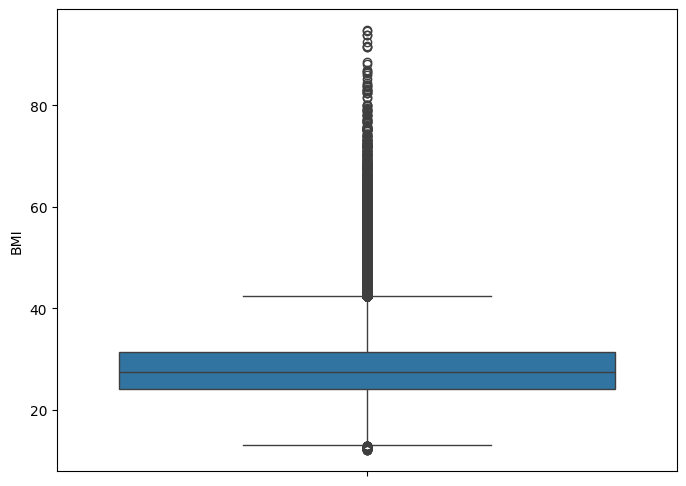

In [5]:
# BMI 칼럼의 박스플롯 시각화를 통한 이상치 확인

plt.figure(figsize  =(8,6))
sns.boxplot(y='BMI', data=df)
plt.show()

In [11]:
# BMI 칼럼의 이상치 제거(IQR*3)

# Q1, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

IQR = Q3 - Q1 # IQR 범위
rev_range = 3 # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI']>=Q1-rev_range*IQR) & (df['BMI']<=Q3+rev_range*IQR)
df_rmv = df.loc[filter]

print(df['BMI'].describe())
print(df_rmv['BMI'].describe())


count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


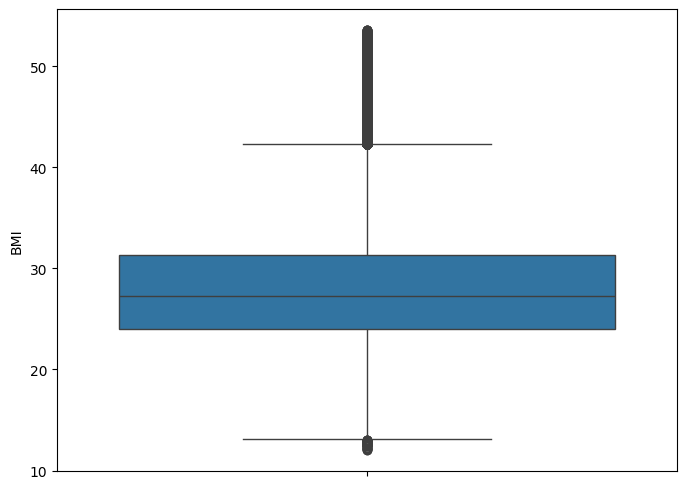

In [12]:
# 이상치 제거 후 박스플롯 시각화

plt.figure(figsize=(8,6))
sns.boxplot(y='BMI', data=df_rmv)
plt.show()

In [18]:
# 이상치 IQR*3 값으로 대치

# 이상치를 상하한선 값으로 대치하는 함수
def replace_outlier(value):
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3

    if ((value < (Q1-rev_range*IQR))):
        value = Q1 - rev_range*IQR
    if ((value > (Q3+rev_range*IQR))):
        value = Q3 + rev_range*IQR
    
    return value

df['BMI'] = df['BMI'].apply(replace_outlier)

print(df['BMI'].describe())

count    319795.000000
mean         28.297843
std           6.214399
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          53.590000
Name: BMI, dtype: float64


In [ ]:
# 이상치 대치 후 박스플롯 시각화

plt.figure(figsize=(8,6))
sns.boxplot(y='BMI', data=df)
plt.show()